# Exploration of services (electricity, natural gas and water) and weather data 

#### Key points
1. Trend through time (year, month, week, day, hour)
2. Minimum and maximum of consumption per service
3. Correlations between variables:
      - Consumption vs. time of year
      - Consumptions vs. consumptions
      - Consumptions vs. weather 

### 1. Consumption Data Analysis

In [49]:
# Import libraries for plotting, reading and wrangling data
library(ggplot2)
library(cowplot)
library(readr)
library(dplyr)

#### a) Electricity Consumption

In [104]:
# Read hourly electricity consumption data in csv file
ElecHourDF      <- read_csv("../../curated/electricity/gold_hourly_electricity.csv",    show_col_types = FALSE)
# Read daily electricity consumption data in csv file
ElecDayDF       <- read_csv("../../curated/electricity/gold_daily_electricity.csv",     show_col_types = FALSE)
# Read monthly electricity consumption data in csv file
ElecMonthDF     <- read_csv("../../curated/electricity/gold_monthly_electricity.csv",   show_col_types = FALSE)

In [110]:
# Define average consumption and outliers
avg_consumption <- mean(ElecHourDF$consumption)
ElecHourDF <- mutate(ElecHourDF, isOutlier = consumption > quantile(consumption, 0.95))

In [112]:
# Transformation of 'ElecHourDF' for visualization purposes
ElecDayHourMayDF <- ElecHourDF %>%
    filter(year == 2012, month == 5) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

ElecDayHourJunDF <- ElecHourDF %>%
    filter(year == 2012, month == 6) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

ElecDayHourJulDF <- ElecHourDF %>%
    filter(year == 2012, month == 7) %>%
    mutate(
        time = format(strptime(hour, format="%H"), format = "%H:00"),
        date_time = paste0(date, " ", time),
        unix_ts = as.numeric(as.POSIXct(date_time)),
        instant = (unix_ts - min(unix_ts)) / (24 * 3600)
    ) %>%
    select(-c(time, date_time, unix_ts))

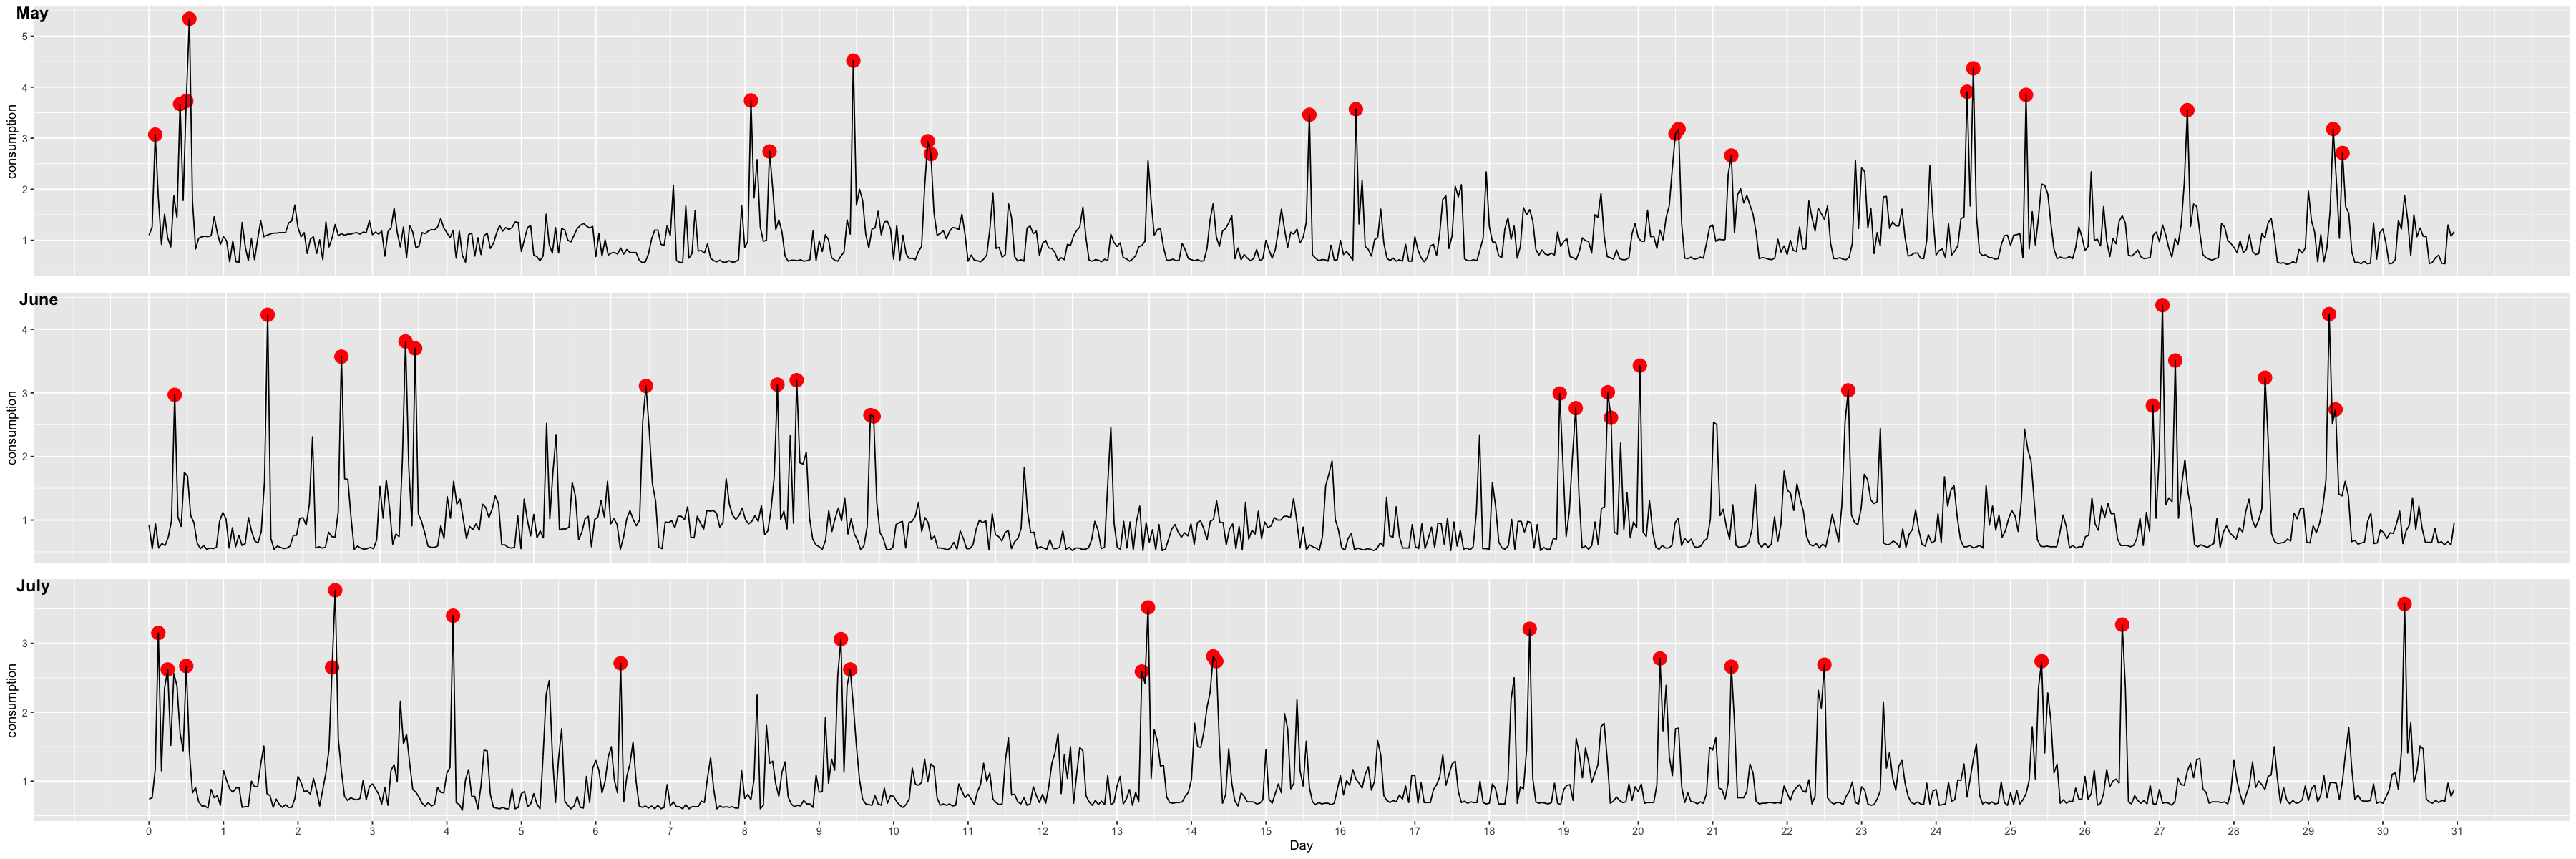

In [128]:
# Visualization of electricity consumption per day and hour
# Set configuration for plot size
options(repr.plot.width = 30, repr.plot.height = 10)

# Outliers characteritics
# May
outliers_size_may   <- ifelse(ElecDayHourMayDF$isOutlier == TRUE, 5, 1)
outliers_alpha_may  <- ifelse(ElecDayHourMayDF$isOutlier == TRUE, 1, 0)
outliers_color_may  <- ifelse(ElecDayHourMayDF$isOutlier == TRUE, "red", "black")
# June
outliers_size_jun   <- ifelse(ElecDayHourJunDF$isOutlier == TRUE, 5, 1)
outliers_alpha_jun  <- ifelse(ElecDayHourJunDF$isOutlier == TRUE, 1, 0)
outliers_color_jun  <- ifelse(ElecDayHourJunDF$isOutlier == TRUE, "red", "black")
# July
outliers_size_jul   <- ifelse(ElecDayHourJulDF$isOutlier == TRUE, 5, 1)
outliers_alpha_jul  <- ifelse(ElecDayHourJulDF$isOutlier == TRUE, 1, 0)
outliers_color_jul  <- ifelse(ElecDayHourJulDF$isOutlier == TRUE, "red", "black")

# Plot definitions
may_plt     <- ggplot(ElecDayHourMayDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_may, size = outliers_size_may, color = outliers_color_may) + geom_line() + scale_x_continuous(breaks = 0:31, labels = 0:31)
june_plt    <- ggplot(ElecDayHourJunDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_jun, size = outliers_size_jun, color = outliers_color_jun) + geom_line()     + scale_x_continuous(breaks = 0:30, labels = 0:30)
july_plt    <- ggplot(ElecDayHourJulDF,    aes(x = instant, y = consumption)) + geom_point(alpha = outliers_alpha_jul, size = outliers_size_jul, color = outliers_color_jul) + geom_line()    + scale_x_continuous(breaks = 0:31, labels = 0:31)

plot_grid(
    may_plt + theme(axis.text.x = element_blank(),
                    axis.ticks.x = element_blank(),
                    axis.title.x = element_blank()), 
    june_plt + theme(axis.text.x = element_blank(),
                    axis.ticks.x = element_blank(),
                    axis.title.x = element_blank()),
    july_plt + labs(x = "Day"),
    labels = c("May", "June", "July"),
    ncol = 1, nrow = 3
)